In [5]:
# imports
import json
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
results = pd.read_csv('survey_results.tsv', sep='\t', encoding='windows-1252')

In [7]:
results

,Timestamp,"Please enter your first name (or a nickname). This is to keep track of who you are between the survey and the discussion, and will not be named or used in the written work.",How many years of experience do you have working with accessible media (for the blind and visually impaired)?,How many years of experience do you have writing and working with image descriptions for the blind and visually impaired?,"What is your native language (if there are multiple, among which is Dutch, please select Dutch)","On a scale between Strongly Agree to Strongly Disagree, please rate the following statements regarding the Image Description Tool [Overall, I am satisfied with how easy it is to use this system.]","On a scale between Strongly Agree to Strongly Disagree, please rate the following statements regarding the Image Description Tool [It was simple to use this system.]","On a scale between Strongly Agree to Strongly Disagree, please rate the following statements regarding the Image Description Tool [I was able to complete the tasks and scenarios quickly using this system.]","On a scale between Strongly Agree to Strongly Disagree, please rate the following statements regarding the Image Description Tool [I felt comfortable using this system.]","On a scale between Strongly Agree to Strongly Disagree, please rate the following statements regarding the Image Description Tool [It was easy to learn to use this system.]",...,"On a scale between Strongly Agree to Strongly Disagree, please rate the following statements regarding the Image Description Tool [I always used the existing caption from the source (under the image) while writing descriptions.]","On a scale between Strongly Agree to Strongly Disagree, please rate the following statements regarding the Image Description Tool [The automated image description (bottom one under the image) provided in the interface is useful.]","On a scale between Strongly Agree to Strongly Disagree, please rate the following statements regarding the Image Description Tool [I used the automated image description (bottom one under the image) while writing descriptions.]","On a scale between Strongly Agree to Strongly Disagree, please rate the following statements regarding the Image Description Tool [The information provided by the system was sufficient to write the description]","On a scale between Strongly Agree to Strongly Disagree, please rate the following statements regarding the Image Description Tool [I can write descriptions with only the image tags and automatic caption.]","On a scale between Strongly Agree to Strongly Disagree, please rate the following statements regarding the Image Description Tool [I can write descripions with only the context tags and existing caption]",Please upload the resulting .json file or paste the text in the question below,Please upload the resulting .json file or paste the text in the question below.1,Please paste the resulting text or upload the resulting .json file in the question above,Email Address
0,12-9-2021 11:34,#4,dec-15,dec-15,Dutch,7 Strongly disagree,2 Agree,2 Agree,2 Agree,2 Agree,...,2 agree,7 Strongly disagree,7 Strongly disagree,7 Strongly disagree,7 Strongly disagree,7 Strongly disagree,NaN,NaN,"[{""title"":""Koningsbergen"",""startTime"":16390442...",NaN
1,12-9-2021 11:38,#5,14,14,Dutch,1 Strongly agree,1 Strongly agree,5 Somewhat disagree,1 Strongly agree,1 Strongly agree,...,2 agree,6 Disagree,6 Disagree,2 agree,7 Strongly disagree,7 Strongly disagree,NaN,NaN,"[{""title"":""Koningsbergen"",""startTime"":16390439...",NaN
2,12-9-2021 11:38,#1,32,20,Dutch,3 Somewhat agree,2 Agree,3 Somewhat agree,2 Agree,1 Strongly agree,...,3 Somewhat agree,6 Disagree,6 Disagree,6 Disagree,6 Disagree,4 Neutral,NaN,NaN,"[{""title"":""Koningsbergen"",""startTime"":16390441...",NaN
3,12-9-2021 11:41,#6,6,6,Dutch,2 Agree,2 Agree,2 Agree,2 Agree,2 Agree,...,2 agree,4 Neutral,4 Neutral,2 agree,6 Disagree,4 Neutral,NaN,NaN,"[{""title"":""Koningsbergen"",""startTime""

In [8]:
survey_only = results.iloc[range(6), range(5, 35)]

In [9]:
for i in range(len(survey_only)):
    for j in range(len(survey_only.loc[0])):
        # update value to only the number
        survey_only.iloc[i, j] = int(survey_only.iloc[i, j][0])

In [10]:
survey_only

,"On a scale between Strongly Agree to Strongly Disagree, please rate the following statements regarding the Image Description Tool [Overall, I am satisfied with how easy it is to use this system.]","On a scale between Strongly Agree to Strongly Disagree, please rate the following statements regarding the Image Description Tool [It was simple to use this system.]","On a scale between Strongly Agree to Strongly Disagree, please rate the following statements regarding the Image Description Tool [I was able to complete the tasks and scenarios quickly using this system.]","On a scale between Strongly Agree to Strongly Disagree, please rate the following statements regarding the Image Description Tool [I felt comfortable using this system.]","On a scale between Strongly Agree to Strongly Disagree, please rate the following statements regarding the Image Description Tool [It was easy to learn to use this system.]","On a scale between Strongly Agree to Strongly Disagree, please rate the following statements regarding the Image Description Tool [I believe I could become productive quickly using this system.]","On a scale between Strongly Agree to Strongly Disagree, please rate the following statements regarding the Image Description Tool [The system gave error messages that clearly told me how to fix problems.]","On a scale between Strongly Agree to Strongly Disagree, please rate the following statements regarding the Image Description Tool [Whenever I made a mistake using the system, I could recover easily and quickly.]","On a scale between Strongly Agree to Strongly Disagree, please rate the following statements regarding the Image Description Tool [The information (such as online help, on-screen messages, and other documentation) provided with this system was clear.]","On a scale between Strongly Agree to Strongly Disagree, please rate the following statements regarding the Image Description Tool [It was easy to find the information I needed.]",...,"On a scale between Strongly Agree to Strongly Disagree, please rate the following statements regarding the Image Description Tool [I always clicked to reveal the full context text (right).]","On a scale between Strongly Agree to Strongly Disagree, please rate the following statements regarding the Image Description Tool [The context text (right) provided in the interface is useful.]","On a scale between Strongly Agree to Strongly Disagree, please rate the following statements regarding the Image Description Tool [I always used the context text (right) while writing descriptions.]","On a scale between Strongly Agree to Strongly Disagree, please rate the following statements regarding the Image Description Tool [The existing caption from the source (under the image) is useful.]","On a scale between Strongly Agree to Strongly Disagree, please rate the following statements regarding the Image Description Tool [I always used the existing caption from the source (under the image) while writing descriptions.]","On a scale between Strongly Agree to Strongly Disagree, please rate the following statements regarding the Image Description Tool [The automated image description (bottom one under the image) provided in the interface is useful.]","On a scale between Strongly Agree to Strongly Disagree, please rate the following statements regarding the Image Description Tool [I used the automated image description (bottom one under the image) while writing descriptions.]","On a scale between Strongly Agree to Strongly Disagree, please rate the following statements regarding the Image Description Tool [The information provided by the system was sufficient to write the description]","On a scale between Strongly Agree to Strongly Disagree, please rate the following statements regarding the Image Description Tool [I can write descriptions with only the image tags and automatic caption.]","On a scale between Strongly Agree to Strongly Disagree, please rate the following statements regarding the Image Descri

In [11]:
sysuse_mean = survey_only.iloc[range(6), range(6)].mean().mean()
sysuse_std = survey_only.iloc[range(6), range(6)].std().mean()

infoqual_mean = survey_only.iloc[range(6), range(6, 13)].mean().mean()
infoqual_std = survey_only.iloc[range(6), range(6, 13)].std().mean()

interqual_mean = survey_only.iloc[range(6), range(13, 16)].mean().mean()
interqual_std = survey_only.iloc[range(6), range(13, 16)].std().mean()

all_mean = survey_only.iloc[range(6), range(16)].mean().mean()
all_mean
# print(sysuse_mean)
# print(sysuse_std)
# print(infoqual_mean)
# print(infoqual_std)
# print(interqual_mean)
# print(interqual_std)

2.791666666666667

In [12]:
sysuse = survey_only.iloc[range(6), range(6)].to_numpy().flatten()
infoqual = survey_only.iloc[range(6), range(6, 13)].to_numpy().flatten()
interqual = survey_only.iloc[range(6), range(13, 16)].to_numpy().flatten()

In [13]:
survey_only.iloc[range(6), range(16,30)]

,"On a scale between Strongly Agree to Strongly Disagree, please rate the following statements regarding the Image Description Tool [The image tags (top left) provided in the interface are useful.]","On a scale between Strongly Agree to Strongly Disagree, please rate the following statements regarding the Image Description Tool [I always used the image tags (top left) while writing descriptions.]","On a scale between Strongly Agree to Strongly Disagree, please rate the following statements regarding the Image Description Tool [The context tags (bottom left) provided in the interface are useful.]","On a scale between Strongly Agree to Strongly Disagree, please rate the following statements regarding the Image Description Tool [I always used the context tags (bottom left) while writing descriptions.]","On a scale between Strongly Agree to Strongly Disagree, please rate the following statements regarding the Image Description Tool [I always clicked to reveal the full context text (right).]","On a scale between Strongly Agree to Strongly Disagree, please rate the following statements regarding the Image Description Tool [The context text (right) provided in the interface is useful.]","On a scale between Strongly Agree to Strongly Disagree, please rate the following statements regarding the Image Description Tool [I always used the context text (right) while writing descriptions.]","On a scale between Strongly Agree to Strongly Disagree, please rate the following statements regarding the Image Description Tool [The existing caption from the source (under the image) is useful.]","On a scale between Strongly Agree to Strongly Disagree, please rate the following statements regarding the Image Description Tool [I always used the existing caption from the source (under the image) while writing descriptions.]","On a scale between Strongly Agree to Strongly Disagree, please rate the following statements regarding the Image Description Tool [The automated image description (bottom one under the image) provided in the interface is useful.]","On a scale between Strongly Agree to Strongly Disagree, please rate the following statements regarding the Image Description Tool [I used the automated image description (bottom one under the image) while writing descriptions.]","On a scale between Strongly Agree to Strongly Disagree, please rate the following statements regarding the Image Description Tool [The information provided by the system was sufficient to write the description]","On a scale between Strongly Agree to Strongly Disagree, please rate the following statements regarding the Image Description Tool [I can write descriptions with only the image tags and automatic caption.]","On a scale between Strongly Agree to Strongly Disagree, please rate the following statements regarding the Image Description Tool [I can write descripions with only the context tags and existing caption]"
0,7,7,7,7,4,2,4,2,2,7,7,7,7,7
1,6,6,6,6,3,2,4,1,2,6,6,2,7,7
2,2,5,4,3,2,2,5,2,3,6,6,6,6,4
3,5,6,3,5,3,1,3,2,2,4,4,2,6,4
4,1,1,5,7,4,1,4,1,6,6,2,7,7,7
5,3,3,3,3,2,1,3,2,2,6,6,7,7,7


In [14]:
img_tags = pd.DataFrame({'img_tags': survey_only.iloc[range(6), [16, 17]].to_numpy().flatten()})
ctx_tags = pd.DataFrame({'ctx_tags': survey_only.iloc[range(6), [18, 19]].to_numpy().flatten()})
ctx_text = pd.DataFrame({'ctx_text': survey_only.iloc[range(6), [20, 21, 22]].to_numpy().flatten()})
ctx_caption = pd.DataFrame({'ctx_caption': survey_only.iloc[range(6), [23, 24]].to_numpy().flatten()})
img_caption = pd.DataFrame({'img_caption': survey_only.iloc[range(6), [25, 26]].to_numpy().flatten()})

specific = pd.concat([img_tags, ctx_tags, ctx_text, ctx_caption, img_caption], axis=1)

In [15]:
x = np.linspace(0, 7)

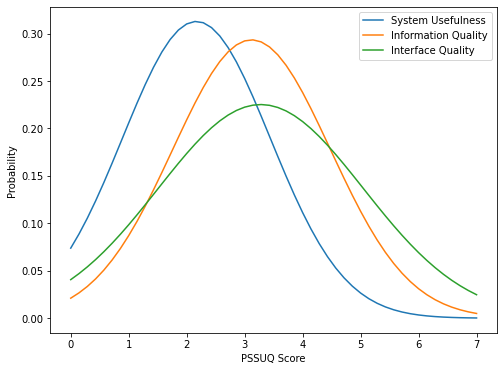

In [16]:
plt.figure(figsize=(8, 6))
plt.plot(x, stats.norm.pdf(x, sysuse_mean, sysuse_std), label='System Usefulness')
plt.plot(x, stats.norm.pdf(x, infoqual_mean, infoqual_std), label='Information Quality')
plt.plot(x, stats.norm.pdf(x, interqual_mean, interqual_std), label='Interface Quality')
plt.legend()
plt.xlabel('PSSUQ Score')
plt.ylabel('Probability')
plt.show()

In [17]:
# sns.boxplot(pd.DataFrame.from_dict({'sysuse': sysuse, 'infoqual': infoqual, 'interqual': interqual})
# sns.boxplot(infoqual)
# sns.boxplot(interqual)
df1 = pd.DataFrame({'sysuse': sysuse})
df2 = pd.DataFrame({'infoqual': infoqual})
df3 = pd.DataFrame({'interqual': interqual})

df = pd.concat([df1, df2, df3], axis=1)

In [18]:
df

,sysuse,infoqual,interqual
0,7,4,2
1,2,7,7
2,2,2,7
3,2,6,2
4,2,6,6
5,7,2,6
6,1,2,3
7,1,4,3
8,5,4,4
9,1,2,3


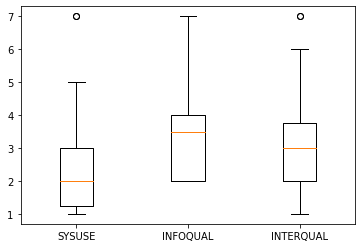

In [19]:
_=plt.boxplot(df.dropna().values)
_=plt.xticks(range(1,4), ['SYSUSE', 'INFOQUAL', 'INTERQUAL'])

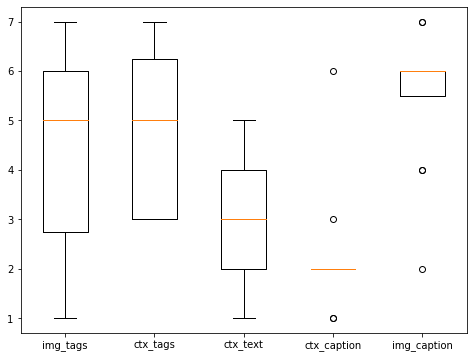

In [20]:
plt.figure(figsize=(8,6))
_=plt.boxplot(specific.dropna().values)
_=plt.xticks(range(1, 6), ['img_tags', 'ctx_tags', 'ctx_text', 'ctx_caption', 'img_caption'])

In [21]:
ctx_caption

,ctx_caption
0,2
1,2
2,1
3,2
4,2
5,3
6,2
7,2
8,1
9,6


In [22]:
print(sysuse_mean)
print(infoqual_mean)
print(interqual_mean)

2.1666666666666665
3.1190476190476195
3.277777777777778


In [23]:
cols = []
for i in range(6):
    cols.append(survey_only.iloc[i, range(16)].to_numpy())

In [24]:
# per_participant = survey_only.columns.values.tolist()
# per_participant
# plt.boxplot(per_participant)
# plt.show()

In [25]:
ordered_cols = [cols[2], cols[5], cols[4], cols[1], cols[0], cols[3]]

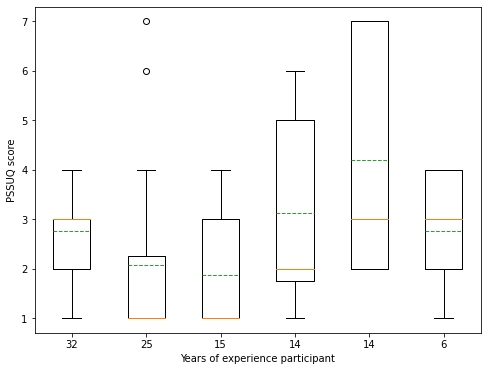

In [26]:
plt.figure(figsize=(8,6))
plt.boxplot(ordered_cols, showmeans = True, meanline = True)
plt.xticks(range(1,7), [32, 25, 15, 14, 14, 6])
plt.ylabel('PSSUQ score')
plt.xlabel('Years of experience participant')
plt.show()

In [27]:
json_data = results.iloc[range(6), range(37, 38)].transpose()
json_objs = []
for i in range(6):
    json_objs.append(json.loads(json_data[i][0]))

In [28]:
first_json = json.loads(json_data[3][0])

In [29]:
first_json[0]

{'title': 'Koningsbergen',
 'startTime': 1639044124723,
 'revealContextTime': 1639044217058,
 'endTime': 1639044376330,
 'description': 'Luchtfoto van een deel van de stad Koningsbergen met vooraan het Slot van Koningsbergen. Het slot is gebouwd in de vorm van een rechthoek rondom een binnenplaats.'}

In [30]:
times = []
for i in range(len(json_objs)):
    time = []
    curr_json = json_objs[i]
    for j in range(len(curr_json)):
        time.append((curr_json[j]['endTime'] - curr_json[j]['startTime'])/1000)
    times.append(time)

print(times)

[[151.166, 209.661, 225.895, 153.461, 119.551, 85.192, 130.755, 131.214, 174.94], [258.68, 339.578, 300.99, 324.434, 159.57, 161.145, 167.174, 126.635, 167.67], [365.238, 245.375, 105.342, 189.586, 96.793, 106.746, 146.341, 133.548, 105.626], [251.607, 188.195, 185.157, 310.573, 128.82, 180.606, 154.478, 139.595, 226.649], [461.941, 278.026, 176.721, 286.332, 168.506, 137.875, 217.381, 247.496, 140.027], [340.373, 157.114, 407.105, 337.645, 170.75, 168.012, 208.64, 70.528, 100.444]]


In [31]:
times_df = pd.DataFrame(times).transpose()
times_df.columns = ['#1', '#2', '#3', '#4', '#5', '#6']
times_df

,#1,#2,#3,#4,#5,#6
0,151.166,258.680,365.238,251.607,461.941,340.373
1,209.661,339.578,245.375,188.195,278.026,157.114
2,225.895,300.990,105.342,185.157,176.721,407.105
3,153.461,324.434,189.586,310.573,286.332,337.645
4,119.551,159.570,96.793,128.820,168.506,170.750
5,85.192,161.145,106.746,180.606,137.875,168.012
6,130.755,167.174,146.341,154.478,217.381,208.640
7,131.214,126.635,133.548,139.595,247.496,70.528
8,174.940,167.670,105.626,226.649,140.027,100.444


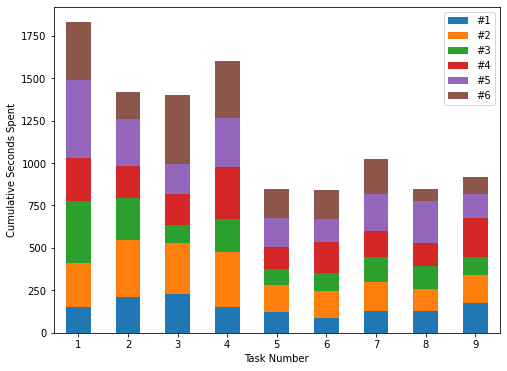

In [32]:
times_df.plot( kind='bar', stacked=True, figsize=(8,6))
plt.xlabel('Task Number')
plt.xticks([0,1,2,3,4,5,6,7,8], [1,2,3,4,5,6,7,8,9], rotation=0)
plt.ylabel('Cumulative Seconds Spent')
plt.show()

[[None, None, None, None, None, 10.054, 19.873, 4.5, 13.343], [91.965, 81.295, 21.414, None, 17.178, 24.903, None, None, 34.198], [7.156, 8.64, 10.28, 9.028, None, 4.439, 7.111, 4.822, 5.415], [92.335, 40.123, None, None, 24.166, 19.407, 16.946, None, 22.137], [110.666, 24.426, 3.239, 5.732, 17.241, 3.529, None, None, None], [None, None, None, None, None, None, None, None, None]]


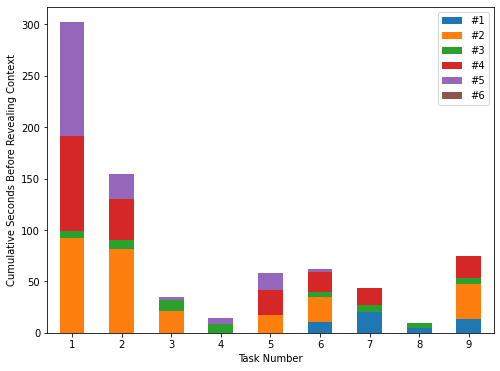

In [33]:
times = []
for i in range(len(json_objs)):
    time = []
    curr_json = json_objs[i]
    for j in range(len(curr_json)):
        if 'revealContextTime' in curr_json[j]:
            time.append((curr_json[j]['revealContextTime'] - curr_json[j]['startTime'])/1000)
        else:
            time.append(None)
    times.append(time)

print(times)

times_df = pd.DataFrame(times).transpose()
times_df.columns = ['#1', '#2', '#3', '#4', '#5', '#6']
times_df

times_df.plot( kind='bar', stacked=True, figsize=(8,6))
plt.xlabel('Task Number')
plt.xticks([0,1,2,3,4,5,6,7,8], [1,2,3,4,5,6,7,8,9], rotation=0)
plt.ylabel('Cumulative Seconds Before Revealing Context')
plt.show()